In [1]:
import numpy as np
import fem2d as fe

First example : MMB Beam fixed on the left with a traction on the right side.



Creating the mesh

Beginning mesh generation...
Mesh generated!


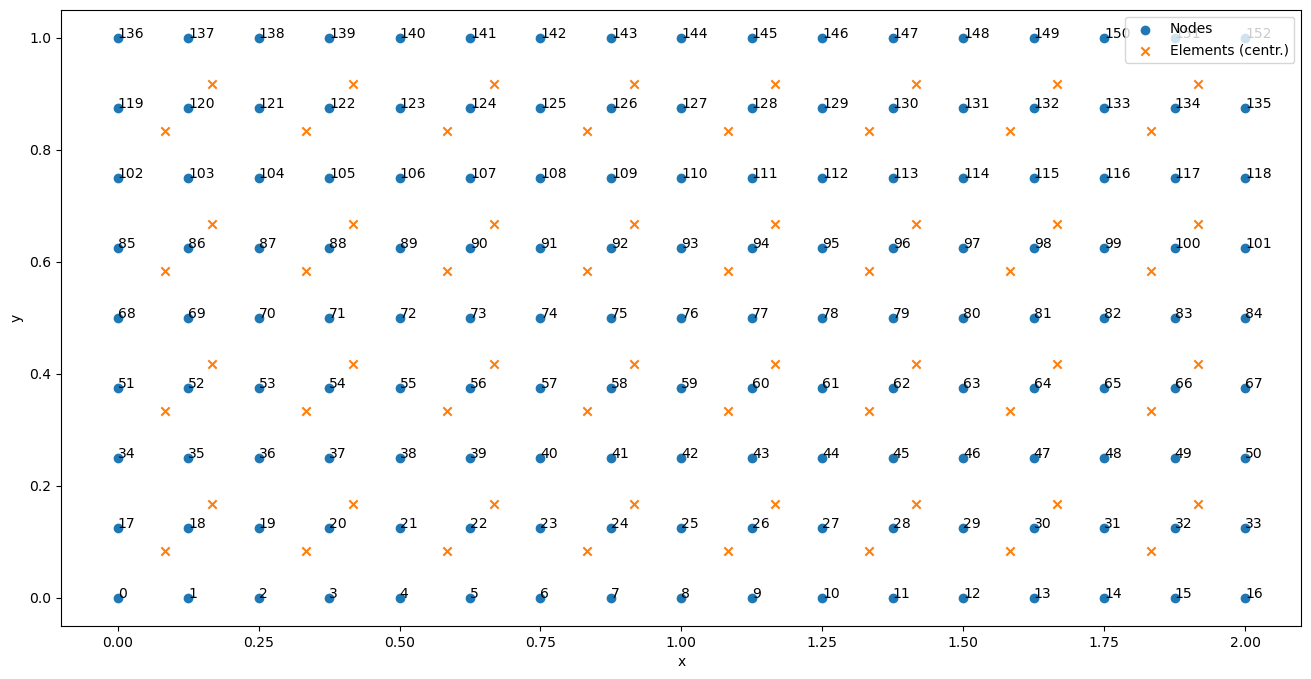

In [2]:
nx = 8
ny = 4
mesh = fe.Mesh(nx, ny, 0, 0, 1, 2)
mesh.displayMesh()
refElem = fe.RefElement(mesh)



Defining boundary conditions

In [3]:
dirichletnodes = np.sort(list(range(0,mesh.getNnodes(),2*nx+1)))
dirichletddls = np.sort(mesh.getDDLnumerVec()[dirichletnodes,:].flatten())
ess = np.zeros_like(dirichletddls)
neumannnodes = np.array([67,84,101])
neumannddls = np.sort(mesh.getDDLnumerVec()[neumannnodes,:].flatten())
nat = np.array([0,-0.1,0,-0.1,0,-0.1])

Declaring the problem

Beginning assembly...
Assembly done!
Beginning solving...
Solved! (residual = 1.780271413122414e-14)


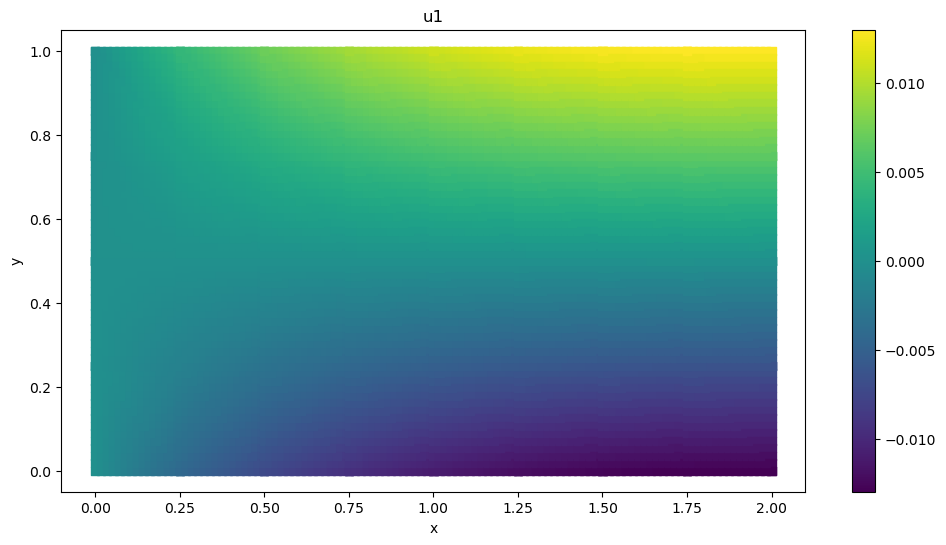

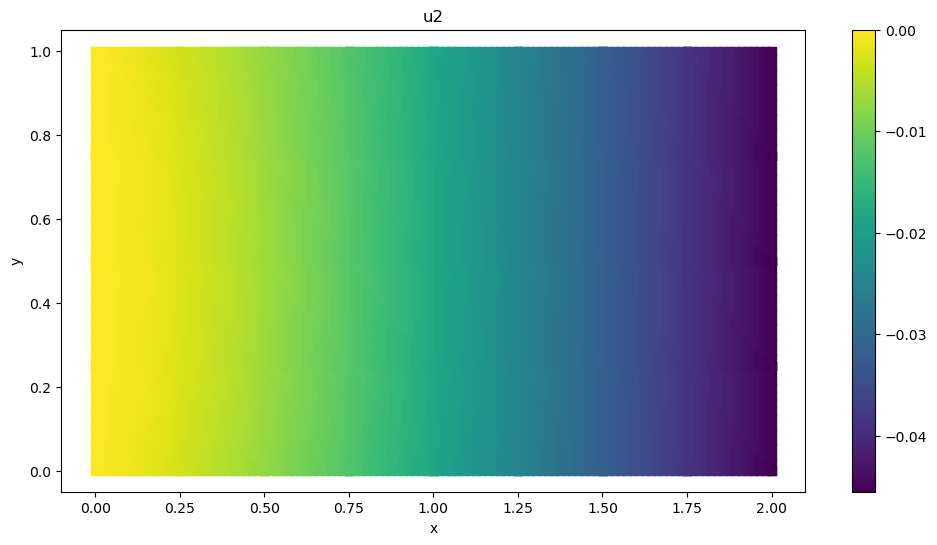

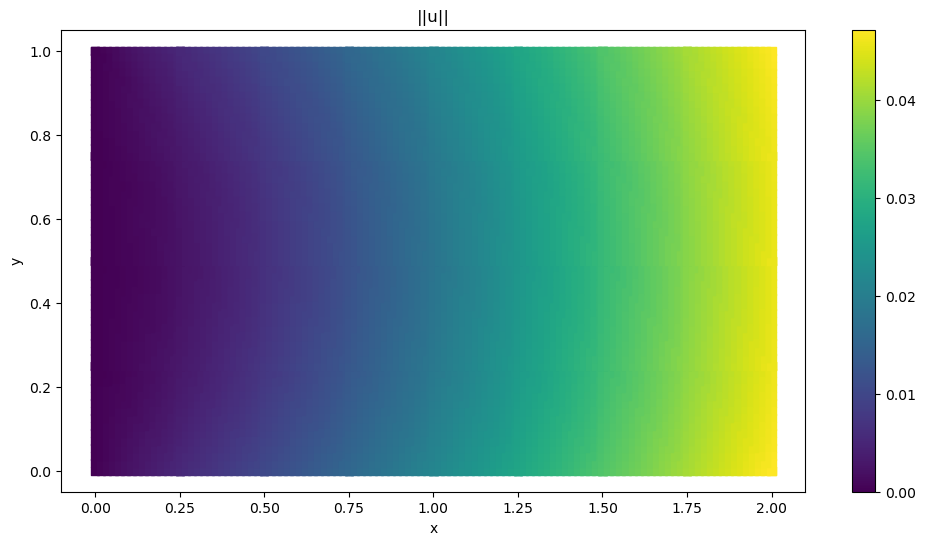

In [4]:
dimU = 2
elas_solver = fe.Problem(mesh,dimU)

# Add the boundary condition
elas_solver.setDirichletBC(dirichletddls,ess)
elas_solver.setNeumannBC(neumannddls,nat)

# Add the weak formulation terms
mDivSigmaUEpsV = fe.ElasticityTerm(refElem)
mDivSigmaUEpsV.setParams(100,0.3)
elas_solver.addTerm(mDivSigmaUEpsV)
gravity = lambda x : np.array([0,-0.1])
bodyforce = fe.SourceTermVec(refElem)
bodyforce.setParams(gravity)
elas_solver.addTermRHS(bodyforce)

# Solve
U = elas_solver.solve()
refElem.displaySolution(U, 15, dimU)

Second Example : Heat distribution on a rectangular plate, isolated on the top and fixed temperature on the other 3 sides

Beginning assembly...
Assembly done!
Beginning solving...
Solved! (residual = 6.773595034338389e-16)


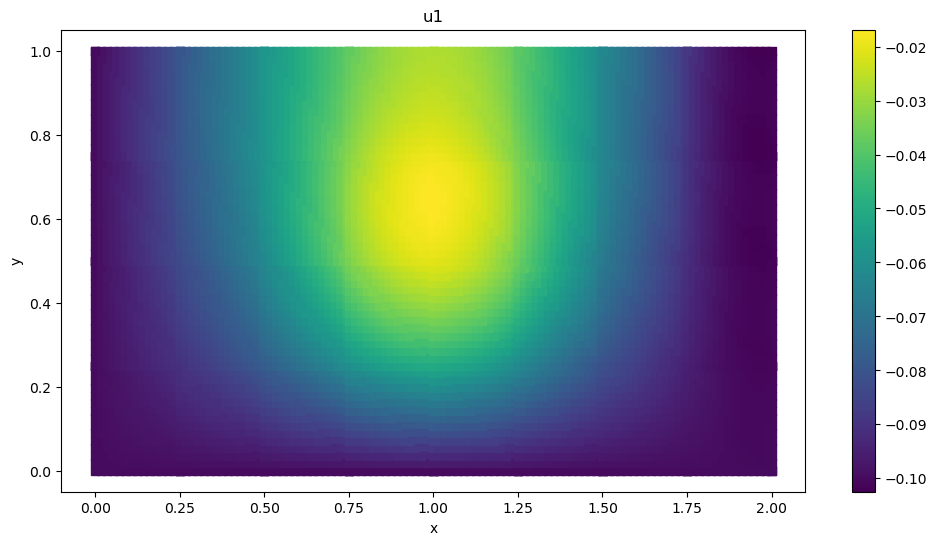

In [5]:
# We keep the same mesh ...

# Boundary conditions
dirichletnodes = np.sort(list(range(0,mesh.getNnodes(),2*nx+1))+list(range(15,mesh.getNnodes(),2*nx+1))+list(range(0,2*nx,1)))
dirichletddls = np.sort(mesh.getDDLnumerScal()[dirichletnodes].flatten())
ess = -0.1*np.ones_like(dirichletddls)

# Declare the problem
dimU = 1
temp_solver = fe.Problem(mesh,dimU)
temp_solver.setDirichletBC(dirichletddls,ess)

# Add weak formulation terms (this time there is a RHS only term)
mDivAGradT = fe.DiffusionTerm(refElem)
mDivAGradT.setParams(np.array([np.eye(2) for k in range(mesh.getNelems())]))
temp_solver.addTerm(mDivAGradT)
f = lambda x : max(0,1-5*((x[0]-1)**2+(x[1]-0.5)**2))
heatsource = fe.SourceTermScal(refElem)
heatsource.setParams(f)
temp_solver.addTermRHS(heatsource)

# Solve 
T = temp_solver.solve()
refElem.displaySolution(T, 15, dimU)